[255 255 255]


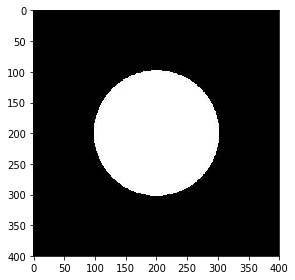

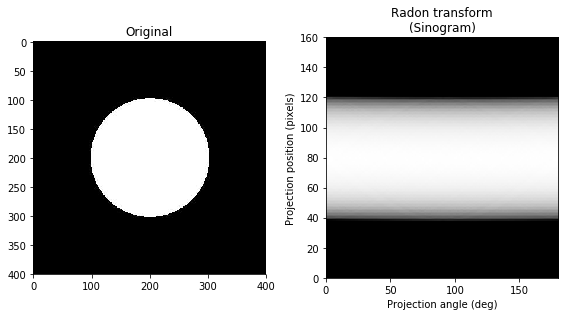

In [60]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from skimage import io

def narysuj(X,Y):
    plt.plot(X,Y)
    plt.yticks(range(max(Y)+1))
    plt.grid(True, linestyle='--')
    plt.xlim(0,max(X))
    plt.ylim(0,max(Y))
    plt.show()
    
def bresenham(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    deltax = x1 - x0
    deltay = y1 - y0
    if(deltax==0): return "jest to prosta pionowa x="+x1
    deltaeps = abs(deltay/deltax) #wsp. kierunkowy funkcji 'a'
    eps = 0.0
    y = y0
    #fig = plt.figure()
    #ax = fig.add_axes([x0,])
    for x in range(x0,x1+1):
        #print('x=',x)
        #plt.figure(1)
        #plt.plot(x,y)
        #fig = plt.subplot(211)
        
        pikselX.append(x)
        pikselY.append(y)
        eps = eps + deltaeps
        if(eps >= 0.5):
            y = y + np.sign(deltay) * 1
            eps = eps - 1.0
    return pikselX,pikselY
        
def bresenham2(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    deltax = x1 - x0
    deltay = y1 - y0
    if(deltax==0): return "jest to prosta pionowa x="+x1
    D = 2*deltay - deltax
    y = y0
    #fig = plt.figure()
    #ax = fig.add_axes([x0,])
    for x in range(x0,x1+1):
        #print('x=',x)
        #plt.figure(1)
        #plt.plot(x,y)
        #fig = plt.subplot(211)
        pikselX.append(x)
        pikselY.append(y)
        if(D > 0):
            y=y+1
            D=D-2*deltay
        D = D+2*deltay
    return pikselX,pikselY      
#a,b=bresenham(0,1,6,4)
#print(a,',',b)
#narysuj(a,b)

def wczytajObraz(nazwaPliku):
    image = io.imread(nazwaPliku)
    #image = rgb2gray(image)
    io.imshow(image)
    return image

from skimage.transform import radon, rescale
obraz = wczytajObraz("tomograf-zdjecia/Kolo.jpg")
print(obraz[200,200])
io.imshow(obraz)

image = io.imread("tomograf-zdjecia/Kolo.jpg", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(obraz, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

Obraz.shape =  (400, 400, 3)
nowy obraz.shape= (400, 400, 3)
r= 282.84271247461896
emiter= [200. 200.]
emiter= [200. 200.]
[[-282    0]
 [-200 -199]
 [   0 -282]]
liniaX= []
liniaX= []
liniaX= []
[[], [], []] [[], [], []]


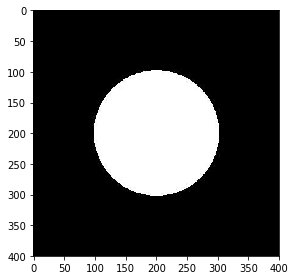

In [61]:
import numpy as np
#obraz a * a
# r = a * sqrt(2) / 2
# 1 emiter, n - detektorow
# screen (rozmiescic emiter i detektory i tam wgl)
# 
obraz = wczytajObraz("tomograf-zdjecia/Kolo.jpg")
print('Obraz.shape = ',obraz.shape)
if(obraz.shape[0]!=obraz.shape[1]):
    roznica = obraz.shape[0] - obraz.shape[1]
    m = np.zeros((roznica,obraz.shape[0],3))
    print('m.shape=',m.shape)
    #print('m.t=',m.T)
    if(roznica > 0):
        np.concatenate((obraz,m.T),axis=1)
        print('nic')
        
        
print('nowy obraz.shape=',obraz.shape)
r = obraz.shape[0] / np.sqrt(2)
alfa = 45 * np.pi / 180
print('r=',r)
emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
print('emiter=',emiter)
#emiter[0] = emiter[0] + obraz.shape[0]/2
#emiter[1] = abs(emiter[1] - obraz.shape[0]/2)
print('emiter=',emiter)
liczbaDetektorow = 3
rozpietosc = 90 * np.pi / 180
detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)

for i in range(1,liczbaDetektorow):
    detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
    detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
    
    #detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
    #detektory[i,1] = abs(detektory[i,1] - obraz.shape[0]/2)
print(detektory)

liniaX = []
liniaY = []
wszystkieLinieX = []
wszystkieLinieY = []
for i in range(liczbaDetektorow):
    liniaX,liniaY = bresenham2(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
    #for j in range(len(l))
    print('liniaX=',liniaX)
    wszystkieLinieX.append(liniaX)
    wszystkieLinieY.append(liniaY)

#wszystkieLinie[2]
print(wszystkieLinieX,wszystkieLinieY)
emiter[0] = emiter[0] + obraz.shape[0]/2
emiter[1] = abs(emiter[1] - obraz.shape[0]/2)

plt.plot(wszystkieLinieX[2],wszystkieLinieY[2])
    #for i in range(len(pikseleX)):
    #print(pikseleX[i],pikseleY[i])
#obraz[emiter[0]:emiter[0]+5,emiter[1]:emiter[1]+5]=[0,0,255]
#for i in range(liczbaDetektorow):
#    obraz[detektory[i,0]:detektory[i,0]+5,detektory[i,1]:detektory[i,1]+5]=[255,0,0]
#obraz = obraz[::-1,:]


plt.show()
#io.imshow(obraz)

In [3]:
a = np.array([[[0,0,0],[1,1,1]],[[0,0,0],[0,0,0]]])
print('shape=',a.shape)
print(a)
b = np.array([[0,0,0],[1,1,1]])
print('shape=',b.shape)
print(b)
print('wynik')
print(np.concatenate((a,b.T),axis=1))

shape= (2, 2, 3)
[[[0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]]]
shape= (2, 3)
[[0 0 0]
 [1 1 1]]
wynik


ValueError: all the input arrays must have same number of dimensions

In [62]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
print('a.shape=',a.shape)
print('b.shape=',b.shape)
print(np.concatenate((a,b.T),axis=1))

a.shape= (2, 2)
b.shape= (1, 2)
[[1 2 5]
 [3 4 6]]


In [54]:
x = 45 * np.pi / 180
print(np.cos(x))

0.7071067811865476
